In [1]:
import pandas as pd
import numpy as np
import gensim
import csv
from gensim.models import Word2Vec
from gensim.models import FastText
from sklearn.manifold import TSNE
import multiprocessing
import matplotlib.pyplot as plt

from adjustText import adjust_text
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
#load the preprocess data
df = pd.read_csv(r"C:\Users\manas\Documents\Master Thesis\code\Manasa2022\skill_id\processed_data\cleaned_data.csv")
df.head()

,skill,skill_id
0,emdr,12473585.0
1,io,955308.0
2,product development,972534.0
3,business development,972528.0
4,automatisering,1588585.0


In [3]:
manasa =  df.head(50)

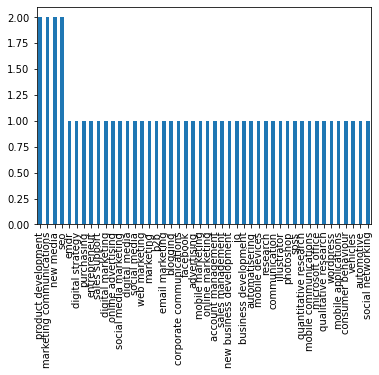

In [4]:
counts = manasa['skill'].str.split(r',\s+', expand=True).stack().value_counts()
counts.plot(kind='bar')
plt.show()

In [5]:
#converting data into skill_id to replace with skill
df1 = df
df1.index = df1['skill']
df1 = df1.drop(['skill'], axis = 1)
skill = "coaching"
id = df1.loc[skill]['skill_id'].unique()
id

array([977782.])

In [7]:
len(id)

1

In [9]:
sent = [row.split(',') for row in df['skill']]

sent[:10]

[['emdr'],
 ['io'],
 ['product development'],
 ['business development'],
 ['automatisering'],
 ['marketing communications'],
 ['mobile devices'],
 ['research'],
 ['communication'],
 ['new media']]

In [10]:
len(sent)

5672502

In [10]:
model = FastText(sentences=sent, min_count=2, vector_size=100, workers=5, window=5, sg=1)

In [6]:
model.wv.most_similar('research', topn=7)

[('capacitymanagement', 0.3580177426338196),
 ('python', 0.3484627604484558),
 (' quality assurance', 0.3466576039791107),
 ('pharma industrie', 0.3324006497859955),
 ('officemanagement', 0.3295593559741974),
 ('verkoopadministratie', 0.32780009508132935),
 ('bouwplaatsmanagement', 0.32555875182151794)]

In [11]:
model.wv.most_similar('Data Engineer',topn=5)

[('pro engineer', 0.46215516328811646),
 ('engineering ', 0.3571832776069641),
 ('landschapsarchitectuur', 0.35343462228775024),
 (' network engineer', 0.3465878963470459),
 ('cost engineering', 0.34596383571624756)]

In [7]:
words = list(model.wv.index_to_key)

len(words)

12613

In [8]:
new_df = pd.DataFrame(columns=['skill', 'skill_id'])
new_list = []
for name in words:
    id = df1.loc[name]['skill_id'].unique()
    t = {'skill': name, 'skill_id': id[0]}
    new_list.append(t)
    new_df = new_df.append(t, ignore_index = True)

In [10]:
new_df.head(10)

,skill,skill_id
0,coaching,977782.0
1,microsoft office,957701.0
2,change management,958531.0
3,social media,957679.0
4,sales,972530.0
5,microsoft excel,972468.0
6,project management,956733.0
7,interim management,972533.0
8,microsoft word,972787.0
9,marketing,972526.0


In [11]:
#appending the skill with skill_id for the words in vocab
list1 = []
list2 = []
for ele in new_list:
    list1.append(ele['skill'])
    list2.append(ele['skill_id'])

In [12]:
#converting into dictionary
we_dict = {word:model.wv[word] for word in words}


In [13]:
df2 = pd.DataFrame(we_dict)
#data_frame = pd.DataFrame.from_dict(we_dict,orient='index')
df2 =df2.rename(columns=dict(zip(list1,list2)))
df2.head(3)

,977782.0,957701.0,958531.0,957679.0,972530.0,972468.0,956733.0,972533.0,972787.0,972526.0,...,972652.0,972433.0,955132.0,955145.0,7546930.0,7547152.0,954853.0,958678.0,972547.0,972880.0
0,-0.000536,-0.008620,0.000095,-0.008243,-0.007139,-0.008727,0.008132,0.008168,-0.009579,-0.005156,...,-0.005072,0.007189,0.003709,0.001830,0.009313,0.009265,-0.002076,-0.001798,-0.008128,-0.004930
1,0.000236,0.003666,0.003077,0.009299,0.001241,0.002130,-0.004457,-0.004443,0.008943,-0.006668,...,0.005297,0.003173,0.005719,-0.009895,-0.006425,-0.000200,0.003264,0.003850,-0.000683,0.004885
2,0.005103,0.005190,-0.006813,-0.000198,-0.007177,-0.000874,-0.001068,0.008985,0.004165,-0.007777,...,-0.008870,0.004645,0.000739,-0.004568,0.007693,-0.007884,0.002648,-0.005518,0.007726,0.005168


In [18]:
data_frame.head(3)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
coaching,-0.000536,0.000236,0.005103,0.009009,-0.009303,-0.007117,0.006459,0.008973,-0.005015,-0.003763,...,0.001631,0.000190,0.003474,0.000218,0.009619,0.005061,-0.008917,-0.007042,0.000901,0.006393
microsoft office,-0.008620,0.003666,0.005190,0.005742,0.007467,-0.006168,0.001106,0.006047,-0.002840,-0.006174,...,0.001088,-0.001576,0.002197,-0.007882,-0.002717,0.002663,0.005347,-0.002392,-0.009510,0.004506
change management,0.000095,0.003077,-0.006813,-0.001375,0.007669,0.007346,-0.003673,0.002643,-0.008317,0.006205,...,-0.004509,0.005702,0.009180,-0.004100,0.007965,0.005375,0.005879,0.000513,0.008213,-0.007019


In [14]:
df3 = df2.groupby(df2.columns,axis=1).mean()
df3.head()

,7.0,14.0,21.0,22.0,34.0,65.0,78.0,96.0,113.0,117.0,...,67365501.0,67435856.0,67525990.0,67525994.0,67525996.0,67658437.0,67673382.0,67673383.0,67673384.0,70472798.0
0,-0.000946,-0.003801,0.006048,0.004522,0.003862,0.003544,-0.002300,0.001289,-0.009283,-0.000708,...,0.000492,-0.001089,-0.008595,-0.005948,0.007090,-0.000447,0.000990,0.000960,0.002068,0.000785
1,-0.007607,0.005475,0.004392,-0.002516,0.000122,0.009488,0.000546,-0.001289,-0.003723,0.000400,...,-0.008553,0.007071,0.008836,0.000886,-0.001226,-0.006654,-0.002321,-0.004195,0.000268,0.002200
2,-0.005777,-0.004425,-0.000483,0.004071,-0.001091,0.009681,0.004369,0.000426,-0.003398,-0.007163,...,-0.001543,0.000018,-0.004639,-0.000278,0.001586,0.001285,0.003278,0.000276,-0.002295,0.001320
3,0.001703,-0.003827,-0.004716,-0.001111,0.005912,-0.005802,0.002046,-0.001749,0.003997,-0.005325,...,-0.001427,-0.000088,0.001769,-0.000397,0.001301,0.006029,0.005531,0.006075,0.003337,-0.009102
4,-0.009432,0.000589,0.005658,0.000389,-0.001989,-0.006462,-0.001228,-0.000970,-0.006747,-0.005121,...,-0.005497,-0.000206,-0.002567,0.004103,-0.003644,0.008900,0.005357,-0.004445,-0.001434,-0.004935


In [14]:
cos_df = pd.DataFrame(cosine_similarity(df3.T), columns = df3.columns)
cos_df.index = df3.columns
#cos_df = cos_df.rename(index=dict(zip(list1,list2)))
cos_df

,7.0,14.0,21.0,22.0,34.0,65.0,78.0,96.0,113.0,117.0,...,67365501.0,67435856.0,67525990.0,67525994.0,67525996.0,67658437.0,67673382.0,67673383.0,67673384.0,70472798.0
7.0,1.000000,-0.065748,-0.000627,-0.011568,0.029213,0.061558,-0.002753,-0.079522,0.049510,-0.136369,...,0.045118,0.219209,0.082373,0.055556,0.146580,0.118171,-0.047828,0.024960,0.155021,0.022744
14.0,-0.065748,1.000000,0.121783,0.081757,-0.027266,-0.001749,-0.057493,-0.122103,-0.147149,0.100944,...,-0.102782,-0.098115,0.200593,0.006923,0.085774,-0.135215,-0.067193,-0.024720,-0.110765,-0.112900
21.0,-0.000627,0.121783,1.000000,0.113320,-0.308436,0.016617,-0.053463,0.059363,0.010205,-0.195272,...,0.024794,-0.001393,0.035584,-0.026511,0.197443,0.125025,0.179076,-0.066673,0.105398,0.024622
22.0,-0.011568,0.081757,0.113320,1.000000,0.127950,-0.015484,-0.065641,0.236503,-0.039073,-0.082338,...,-0.065568,-0.013674,-0.139744,-0.174982,-0.027576,-0.022706,-0.050781,-0.091328,-0.156844,0.079409
34.0,0.029213,-0.027266,-0.308436,0.127950,1.000000,-0.128041,0.022081,-0.171109,0.103565,0.047117,...,0.079384,-0.015861,0.009009,-0.000408,-0.099783,-0.127175,-0.140236,-0.112799,0.042999,-0.094343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67658437.0,0.118171,-0.135215,0.125025,-0.022706,-0.127175,-0.007386,0.086466,-0.079095,0.134524,-0.165371,...,0.014290,0.154049,-0.077468,-0.074549,0.010675,1.000000,0.031817,-0.177648,0.092235,0.123187
67673382.0,-0.047828,-0.067193,0.179076,-0.050781,-0.140236,-0.092317,-0.187520,0.101515,0.064607,-0.055362,...,-0.004725,0.035287,0.146744,0.131070,-0.062562,0.031817,1.000000,0.077385,0.211188,-0.110754
67673383.0,0.024960,-0.024720,-0.066673,-0.091328,-0.112799,-0.050435,-0.247825,-0.081064,0.060426,0.120695,...,-0.113840,-0.161097,-0.003810,-0.091600,-0.130425,-0.177648,0.077385,1.000000,0.022571,-0.027274
67673384.0,0.155021,-0.110765,0.105398,-0.156844,0.042999,0.021070,-0.079527,-0.150910,0.155516,-0.201063,...,0.227682,0.191049,-0.015903,-0.065059,0.154573,0.092235,0.211188,0.022571,1.000000,0.084284


In [15]:
#plotting the matrix in order to display the clusters

In [16]:
weight_cosine = cos_df.stack()

weight_cosine

7.0         7.0           1.000000
            14.0         -0.065748
            21.0         -0.000627
            22.0         -0.011568
            34.0          0.029213
                            ...   
70472798.0  67658437.0    0.123187
            67673382.0   -0.110754
            67673383.0   -0.027274
            67673384.0    0.084284
            70472798.0    1.000000
Length: 23765625, dtype: float32

In [17]:
weight_cosine = weight_cosine.rename_axis(('Source', 'Target')).reset_index()

weight_cosine

,Source,Target,0
0,7.0,7.0,1.000000
1,7.0,14.0,-0.065748
2,7.0,21.0,-0.000627
3,7.0,22.0,-0.011568
4,7.0,34.0,0.029213
...,...,...,...
23765620,70472798.0,67658437.0,0.123187
23765621,70472798.0,67673382.0,-0.110754
23765622,70472798.0,67673383.0,-0.027274
23765623,70472798.0,67673384.0,0.084284


In [18]:
weight_cosine.rename(columns = {0: 'weight_cosine'}, inplace = True)

weight_cosine

,Source,Target,weight_cosine
0,7.0,7.0,1.000000
1,7.0,14.0,-0.065748
2,7.0,21.0,-0.000627
3,7.0,22.0,-0.011568
4,7.0,34.0,0.029213
...,...,...,...
23765620,70472798.0,67658437.0,0.123187
23765621,70472798.0,67673382.0,-0.110754
23765622,70472798.0,67673383.0,-0.027274
23765623,70472798.0,67673384.0,0.084284


In [25]:
from sklearn.manifold import TSNE
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(data_frame[:4000])

C:\Users\manas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


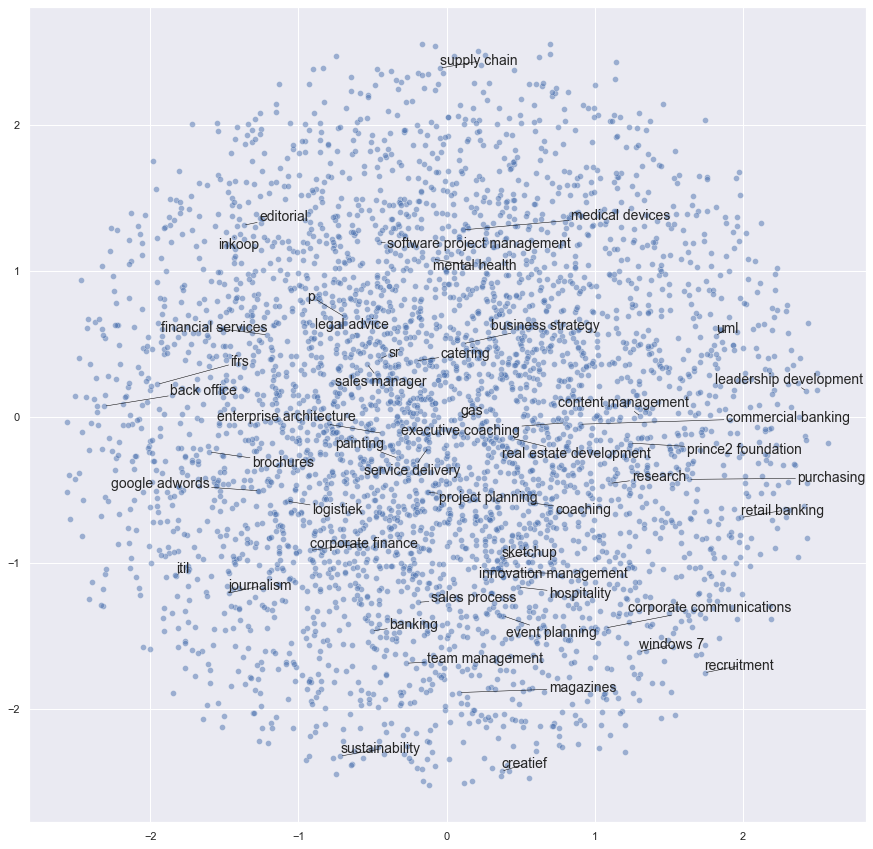

In [27]:
import seaborn as sns
sns.set_style("darkgrid")

sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (15, 15))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 500, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], data_frame.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

In [22]:
weight_cosine.to_csv(r"C:\Users\manas\Documents\Master Thesis\code\Manasa2022\skill_id\word2vec\weight_cosine.csv",header=True,index=False)

In [23]:
#get the skill_id for the co-occurence calcualtion
unique_skill = list(cos_df.columns)
skill_id = pd.DataFrame(unique_skill,columns=['skill_id'])
skill_id.head(3)

,skill_id
0,7.0
1,14.0
2,21.0


In [24]:
len(skill_id)

4875

In [30]:
skill_id.to_csv(r"C:\Users\manas\Documents\Master Thesis\code\Manasa2022\skill_id\testing\skill_id_from_word2vec.csv",header=True,index=False)